In [17]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [18]:
print(train_data.shape) #list of 25000 lists
print(train_data[0]) #intengers encoding words, max is 9999
print(train_labels[0]) #class label: integer from 0 to 45 representing a topic

(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [19]:
#function to decode the integer based review into a real phrase
def decode_review(review):
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(v, k) for (k,v) in word_index.items()])
    decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in review])
    print(decoded_review)

decode_review(train_data[0])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [20]:
#the list of text all have different lenghts... we need a way to standaride it...
#we will be using multi-hot encoding
#since the words are from range 0 to 9999, we'll create an array of zeros and ones
#we initialize the array to all zeros...
#we put ones at the indexes of the words used in the review....
#for example [8,5] would have ones in the position 8 and 5 out of 10000.

import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    #NB se
    #matrix of len(sequence) x dimensions
    results = np.zeros((len(sequence), dimension))
    for i, list in enumerate(sequence):
        for idx in list:
            results[i, idx] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0, :10])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [21]:
#to encode the labels we will be using one-hot-encoding
#since we have 45 categories, we will have an all zeros array
#execpt for the ith index (the one corresponding to the class label)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [22]:
#alternatively we could do it with a keras built int function
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [23]:
#lets build the model
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
#we split our training data into training set and validation set
x_train_set = x_train[:1000]
x_val_set = x_train[1000:]
y_train_set = y_train[:1000]
y_val_set = y_train[1000:]

In [32]:
#we traing the model using the .fit function
history = model.fit(
    x_train_set, y_train_set,
    epochs=20,
    batch_size=256,
    validation_data=(x_val_set, y_val_set)
)

Epoch 1/20
4/4 [==============================] - 1s 179ms/step - loss: 0.8671 - accuracy: 0.8040 - val_loss: 0.9048 - val_accuracy: 0.8027
Epoch 2/20
4/4 [==============================] - 0s 34ms/step - loss: 0.7373 - accuracy: 0.8380 - val_loss: 0.8875 - val_accuracy: 0.8069
Epoch 3/20
4/4 [==============================] - 0s 35ms/step - loss: 0.6328 - accuracy: 0.8750 - val_loss: 0.8736 - val_accuracy: 0.8099
Epoch 4/20
4/4 [==============================] - 0s 34ms/step - loss: 0.5484 - accuracy: 0.8970 - val_loss: 0.8640 - val_accuracy: 0.8112
Epoch 5/20
4/4 [==============================] - 0s 34ms/step - loss: 0.4733 - accuracy: 0.9180 - val_loss: 0.8527 - val_accuracy: 0.8136
Epoch 6/20
4/4 [==============================] - 0s 36ms/step - loss: 0.4111 - accuracy: 0.9300 - val_loss: 0.8491 - val_accuracy: 0.8161
Epoch 7/20
4/4 [==============================] - 0s 33ms/step - loss: 0.3530 - accuracy: 0.9400 - val_loss: 0.8430 - val_accuracy: 0.8126
Epoch 8/20
4/4 [==========

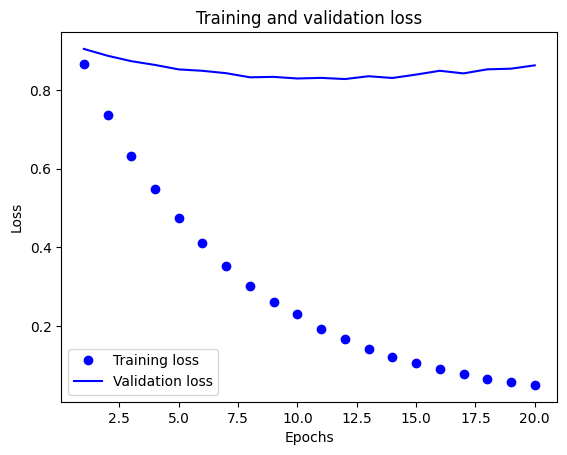

In [33]:
#let plot the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") #blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

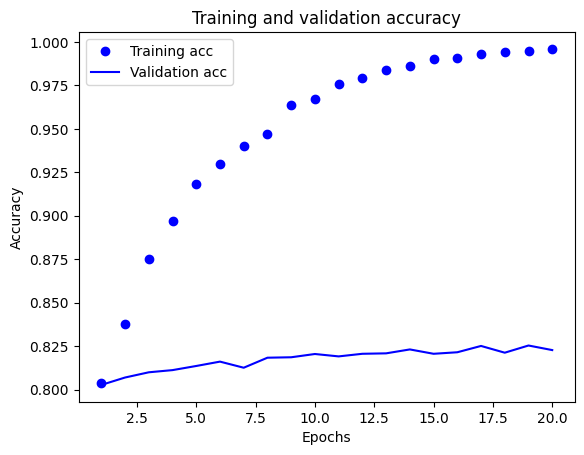

In [34]:
#let plot the training and validation accuracy
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training acc") #blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation acc") #blue line
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
#the model start to overfit after nine epochs
#let's early stopping technique

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,y_train,
    epochs=9,
    batch_size=256,
    validation_data=(x_val_set, y_val_set)
)

#and evaluate results
results = model.evaluate(x_test, y_test)


Epoch 1/9
36/36 [==============================] - 1s 18ms/step - loss: 2.2078 - accuracy: 0.5785 - val_loss: 1.3423 - val_accuracy: 0.6927
Epoch 2/9
36/36 [==============================] - 0s 6ms/step - loss: 1.1482 - accuracy: 0.7533 - val_loss: 0.9193 - val_accuracy: 0.8117
Epoch 3/9
36/36 [==============================] - 0s 6ms/step - loss: 0.8374 - accuracy: 0.8202 - val_loss: 0.6765 - val_accuracy: 0.8478
Epoch 4/9
36/36 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.8633 - val_loss: 0.5191 - val_accuracy: 0.8898
Epoch 5/9
36/36 [==============================] - 0s 5ms/step - loss: 0.4827 - accuracy: 0.8966 - val_loss: 0.4812 - val_accuracy: 0.8787
Epoch 6/9
36/36 [==============================] - 0s 5ms/step - loss: 0.3853 - accuracy: 0.9192 - val_loss: 0.3271 - val_accuracy: 0.9303
Epoch 7/9
36/36 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.9311 - val_loss: 0.2732 - val_accuracy: 0.9445
Epoch 8/9
36/36 [=========